## Kaggle - Time Series Analysis
Data Obtained from Wal-Mart w/ 5 years of store-item sales data

**Goal**: Predict 3 months of sales for 50 different items at 10 different stores

In [186]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [124]:
df=pd.read_csv('train.csv')
print(f'{len(df)} records')
print(f'{len(df["store"].unique())} stores')
print(f'{len(df["date"].unique())} days')
print(f'{len(df["item"].unique())} items')
# df['store'].unique()
# df.head(100)

913000 records
10 stores
1826 days
50 items


In [126]:
df['date']=pd.to_datetime(df['date'])

In [140]:
df['month']=df['date'].map(lambda x: f'{x.year}-{("0"+str(x.month))[-2:]}')
# df['month']=pd.to_datetime(df['month'])
df['year']=df['date'].map(lambda x: f'{x.year}')
# df['year']=pd.to_datetime(df['year'])
df.head(100)

,date,store,item,sales,month,year
0,2013-01-01,1,1,13,2013-01,2013
1,2013-01-02,1,1,11,2013-01,2013
2,2013-01-03,1,1,14,2013-01,2013
3,2013-01-04,1,1,13,2013-01,2013
4,2013-01-05,1,1,10,2013-01,2013
...,...,...,...,...,...,...
95,2013-04-06,1,1,23,2013-04,2013
96,2013-04-07,1,1,17,2013-04,2013
97,2013-04-08,1,1,19,2013-04,2013
98,2013-04-09,1,1,13,2013-04,2013


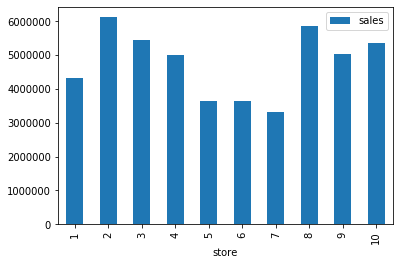

In [128]:
store_sales=pd.DataFrame(df.groupby('store')['sales'].sum()).plot(kind='bar')

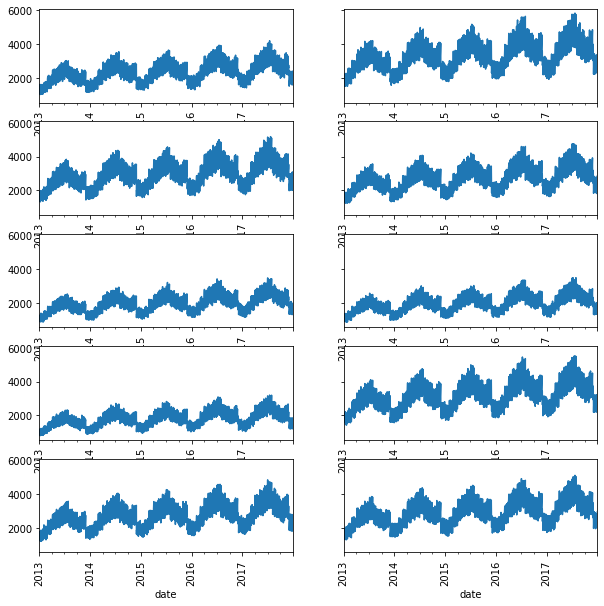

In [129]:
stores_trend=df.pivot_table(index='date', values='sales', columns='store', aggfunc='sum')
all_stores=stores_trend.columns
fig, ax=plt.subplots(5, 2, figsize=(10, 10), sharey=True)
for idx, each_store in enumerate(all_stores): 
    stores_trend[each_store].plot(ax=ax[int(idx/2)][idx%2], rot=90)

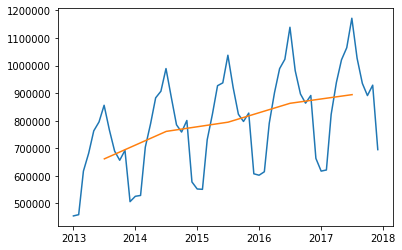

In [189]:
monthly_sales=df.sort_values('date').groupby('month')['sales'].sum().reset_index()
monthly_sales['month']=pd.to_datetime(monthly_sales['month'], format='%Y-%m')
monthly_sales['year']=monthly_sales['month'].map(lambda x: x.year)
yearly_sales=monthly_sales.groupby('year')['sales'].mean().reset_index()
yearly_sales['year']=pd.to_datetime(yearly_sales['year'], format='%Y')
plt.plot(monthly_sales['month'], monthly_sales['sales'])
plt.plot(yearly_sales['year']+datetime.timedelta(6*365/12), yearly_sales['sales'])
plt.show()

### This series is not stationary, which violates the regression assumption. A stationary series is one which: 
* mean, variance, and covariance do not vary with time
![stationary](https://github.com/kevinclee26/time_series_analysis/blob/main/assets/images/image_1.PNG?raw=true)
* use differencing to make series stationary as it is required for time series forecasting models
    * another option would be transformation - power transform, log transform, and square root

### Covariance and Correlation
* Std is a measure of dispersion of a distribution - low Std indicates that values tend to be close to the mean
![stationary](https://github.com/kevinclee26/time_series_analysis/blob/main/assets/images/image_3.PNG?raw=true)    
* Covariance can be negative infinity to positive infinity - it measure how two variables change together, not the dependency
    * Since magnitude can vary with the scaling of the variables - it is only useful to find the direction of the relationship between two variables
![stationary](https://github.com/kevinclee26/time_series_analysis/blob/main/assets/images/image_2.PNG?raw=true)    
* Correlation measures the strength of a relationship between two variables - shows direction and magnitude (can be -1 to +1)
![stationary](https://github.com/kevinclee26/time_series_analysis/blob/main/assets/images/image_4.PNG?raw=true)    

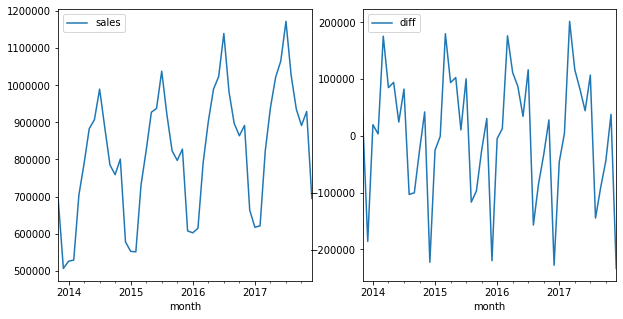

In [200]:
monthly_sales['diff']=monthly_sales['sales'].diff()
monthly_sales.dropna(inplace=True)
monthly_sales
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
monthly_sales.plot(x='month', y='sales', ax=ax[0])
monthly_sales.plot(x='month', y='diff', ax=ax[1])

### Time Series Forecast
1. ARIMA - autoregressive integrated moving average
    * the information in the past values of the time series can alone be used to predict the future values
    * p - order of the AR term
    * d - order of the MA term
    * q - number of differencing required to make the time series stationary